In [ ]:
pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 7.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
import json
import tweepy
import pandas
import pandas_ta
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
#three_years_before = dt.date.today() - dt.timedelta(days=365 * 3)
djia_file = yf.download('bp', start='2019-01-01',end=dt.date.today())
# djia_file.to_csv("/content/drive/MyDrive/Colab Notebooks/paper/djia.csv")
djia_file=djia_file[['Adj Close']]
djia_file


# import datetime
# def djia_collect(y,m,d,market):
#     start = int(time.mktime(datetime.datetime(y,m,d,0,1).timetuple()))
#     end = int(time.mktime(datetime.datetime.now().timetuple()))
#     download = f"https://query1.finance.yahoo.com/v7/finance/download/{market}?period1={start}&period2={end}&interval=1d&events=history&includeAdjustedClose=true"
#     djia_file = pandas.read_csv(download)
#     djia_file.to_csv("/content/drive/MyDrive/Colab Notebooks/paper/djia.csv")
#     return djia_file

# djia_collect(2019,1,1,"bp")

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2019-01-02,32.369118
2019-01-03,32.553650
2019-01-04,33.576977
2019-01-07,33.686024
2019-01-08,33.576977
...,...
2021-09-22,25.650000
2021-09-23,26.160000
2021-09-24,26.240000


In [ ]:
dataset = yf.download('bp', start='2019-01-01',end=dt.date.today())
dataset2 = dataset
dataset = dataset[['Adj Close']]
dataset.ta.ema(close='Adj Close', length=10, append=True)
dataset = dataset.iloc[10:]
dataset.head()

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas_ta/core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


,Adj Close,EMA_10
Date,,
2019-01-16,33.652466,33.541290
2019-01-17,33.660858,33.563030
2019-01-18,34.189293,33.676896
2019-01-22,33.618923,33.666355
2019-01-23,33.652466,33.663830


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['Adj Close']], dataset[['EMA_10']], test_size=.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.98202663]]
Mean Absolute Error: 0.5940028343574464
Coefficient of Determination: 0.9818334581160549


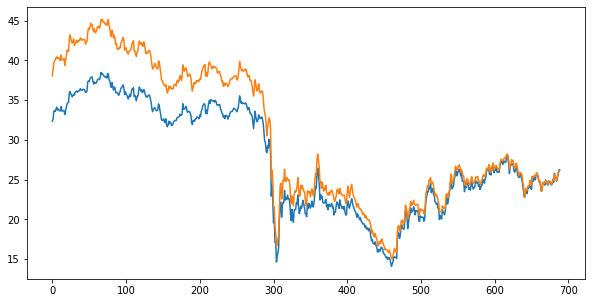

In [ ]:
djia_csv = pandas.read_csv(r"/content/drive/MyDrive/Colab Notebooks/paper/djia.csv")
avg=(djia_csv["High"]+djia_csv["Low"])/2

plt.figure(figsize=(10,5))
plt.plot(djia_csv["Adj Close"])
plt.plot(avg)
plt.show()

In [ ]:
dji_dict = {"Date":djia_csv["Date"],"Djia": avg}
dji_pd = pandas.DataFrame(dji_dict)
dji_pd.head()
# dji_pd.to_csv("/content/drive/MyDrive/Colab Notebooks/paper/avgdji.csv")
# avg_dji = pandas.read_csv(r"/content/drive/MyDrive/Colab Notebooks/paper/avgdji.csv")
# pandas.DataFrame(avg_dji).head()

,Date,Djia
0,2019-01-02,38.075001
1,2019-01-03,38.770000
2,2019-01-04,39.750000
3,2019-01-07,39.945002
4,2019-01-08,40.045000


In [ ]:
try:
    with open("/content/drive/MyDrive/Colab Notebooks/paper/api.txt") as api_file:
    key, key_secret, token, token_secret = api_file.read().split('\n')
    auth = tweepy.OAuthHandler(key,key_secret)
    auth.set_access_token(token,token_secret)
    api = tweepy.API(auth,wait_on_rate_limit=True)
    if(api.trends_available()): print("Successfully Authorized.")
except:
    print("Check keys and internet!")

#api.rate_limit_status()

Successfully Authorized.


In [ ]:
trends = api.trends_place(id = 1, exclude = "hashtags")
htag=[]    # id= 1 (WOEID of GLOBAL)
for value in trends:
#     print(value)
    for trend in value['trends']:
        htag.append(trend['name'])
print(htag)

['Norris', 'Hamilton', 'Verstappen', 'ŹOOĻ', 'Chan', 'KIM SEUNGMIN', 'Checo', 'Bottas', 'McLaren', 'WE LOVE YOU LISA', 'Sainz', 'Alonso', 'ハミルトン', 'TRIGGER', 'Chris Martin', 'フェルスタッペン', 'Raul Jimenez', 'Mert Hakan', 'Wahlzettel', 'Valencia', 'レミフラ', 'Pıt Pıt Şeker', 'Berisha', '第2クール', 'レジェンズ', 'Alaphilippe', 'Stimmzettel', 'Prince1000万', 'ロッキー', 'Ferrari', 'Ricciardo', 'CHARYBDIS CONCEPT MOODBOARD', '花巻すみれ', 'レーティング', 'Red Bull', '夢の通り道', 'ナナライ', '포타 연성 문장']


In [ ]:
rw_tweet = tweepy.Cursor(api.search, q=htag[1], lang="en", result_type='popular', since="2019-01-01").items(50)

tw_date,tweet,tw_like=[],[],[]

for x in rw_tweet:
    tw_date.append(x.created_at.strftime('%m/%d/%Y'))
    tw_like.append(x.favorite_count)
    tweet.append(x.text)
print(tw_like)

[10660, 8670, 7021, 5049, 6293, 6026, 1659, 2790, 3120, 3172, 2216, 9280, 8162, 1851, 2619, 327, 2033, 721, 440, 1740, 151, 224, 1608, 697, 22706, 63061, 602, 3700, 2987, 14396, 2572, 141, 145659, 10876, 9903, 92, 823, 2421, 1599, 1989, 973, 1276, 249, 184, 767, 505, 782, 1349, 394, 286, 119]


In [ ]:
backup_tweet = {"Date":tw_date,"Tweet": tweet,"Likes":tw_like}
tweet_file = pandas.DataFrame(backup_tweet)

tweet_file.to_csv("/content/drive/MyDrive/Colab Notebooks/paper/tweet.csv")
tweet_file

,Date,Tweet,Likes
0,09/26/2021,🏁 LAP 53/53 END OF RACE 🏁 \n\nTOP 10 \nHamilto...,10660
1,09/26/2021,LAP 51/53\n\nNorris has stayed out on slicks b...,8670
2,09/26/2021,A momentous day for Lewis Hamilton \nA remarka...,7021
3,09/26/2021,Norris was asked for his thoughts on intermedi...,5049
4,09/26/2021,Lewis Hamilton is the first driver in F1 histo...,6293
5,09/26/2021,"If Hamilton has an issue, Mercedes have sacrif...",6026
6,09/26/2021,Congrats to Lewis Hamilton on becoming the fir...,1659
7,09/26/2021,LEWIS HAMILTON WINS THE RUSSIAN GRAND PRIX 🏎\n...,2790
8,09/26/2021,"Norris was sensational today, but hindsight me...",3120
9,09/26/2021,Lewis Hamilton has won the Russian Grand Prix ...,3172


In [ ]:
raw_tweet = pandas.read_csv(r"/content/drive/MyDrive/Colab Notebooks/paper/tweet.csv")
for i in raw_tweet["Tweet"]:
    print(i)

🏁 LAP 53/53 END OF RACE 🏁 

TOP 10 
Hamilton 🏆x💯
Verstappen
Sainz
Ricciardo
Bottas
Alonso
Norris 
Raikkonen
Perez
R… https://t.co/8J6E0eEuez
Lewis Hamilton hits the pit lane wall! 😯

His front wing is damaged - and he faces a race against time to put in an… https://t.co/5x28cQML5M
LAP 51/53

Norris has stayed out on slicks but he's struggling for grip and losing time and then spins off

Hamilto… https://t.co/vm9Qqm2qnt
Lewis Hamilton is the first driver in F1 history to win 100 races! 👏 https://t.co/jer87pVwJB
Norris was asked for his thoughts on intermediates and said "NO!". Hamilton was told to pit, ignored them, team tol… https://t.co/ysRH6pksVP
LEWIS HAMILTON WINS THE RUSSIAN GRAND PRIX 🏎

HISTORY is made! He becomes the first #F1 driver ever to reach 100 wi… https://t.co/GZ2p3FX5co
Norris was sensational today, but hindsight means it was the wrong call not to just mirror Hamilton after holding h… https://t.co/QiXhvYJMOr
Lewis Hamilton has won the Russian Grand Prix for his 100th w

In [ ]:
from textblob import TextBlob

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
import re
polarity,subjectivity=[],[]
#tweet_file.to_csv("/content/drive/MyDrive/Colab Notebooks/paper/clntweet.csv")

for i in raw_tweet["Tweet"]:
    i = i.lower()
    i = re.sub('rt', '',i)
    # i = re.sub('\n', '',i)
    # i = re.sub('[^a-z0-9]+', ' ', i)
    i = ' '.join(l for l in i.split() if (l[0]!='@' and l[0:8:6]!='h/'))
    i = remove_emoji(i)
    polarity.append(getpolarity(i))
    subjectivity.append(getsubjectivity(i))
    print(i)

 lap 53/53 end of race  top 10 hamilton x verstappen sainz ricciardo bottas alonso norris raikkonen perez r…
lewis hamilton hits the pit lane wall!  his front wing is damaged - and he faces a race against time to put in an…
lap 51/53 norris has stayed out on slicks but he's struggling for grip and losing time and then spins off hamilto…
lewis hamilton is the first driver in f1 history to win 100 races! 
norris was asked for his thoughts on intermediates and said "no!". hamilton was told to pit, ignored them, team tol…
lewis hamilton wins the russian grand prix  history is made! he becomes the first #f1 driver ever to reach 100 wi…
norris was sensational today, but hindsight means it was the wrong call not to just mirror hamilton after holding h…
lewis hamilton has won the russian grand prix for his 100th win in f1.
norris on pole!!  lando norris is on pole for the first time in his career!  hamilton spun and nudged the wall…
lewis hamilton becomes the first driver to win 100 formula on

In [ ]:
from statistics import mean
for i in range(len(polarity)):
    print(f"{polarity[i]:.3f}\t: {subjectivity[i]:.3f}")

print(f"\nToday's Average\n{mean(polarity)}\t: {mean(subjectivity)}")

0.500	: 0.500
0.000	: 0.000
0.000	: 0.000
0.625	: 0.367
0.000	: 0.000
0.294	: 0.383
0.083	: 0.783
0.433	: 0.467
0.312	: 0.333
0.350	: 0.244

Today's Average
0.25979166666666664	: 0.30777777777777776
